In [1]:
import pandas as pd

In [2]:
# Featureset einlesen

merged_file = 'files/out/merged_featureset_nonan.csv'

merged_featureset = pd.read_csv(merged_file)
merged_featureset

,Stadtteil,Mietpreis pro qm,Gruenflaeche,AQI,Fahrradhausanzahl,Flaeche,Anzahl_Punkte
0,Allermöhe,9.672555,64.5282,2.211251,0.0,8.645889,0.0
1,Alsterdorf,11.178675,43.2205,2.166802,0.0,3.152301,4698.0
2,Altengamme,9.473979,1.2187,2.211251,0.0,15.605402,1639.0
3,Altona-Altstadt,10.720247,30.2225,2.166802,9.0,2.716112,4796.0
4,Altona-Nord,11.504443,8.2602,2.166802,45.0,2.216385,2513.0
...,...,...,...,...,...,...,...
99,Wilhelmsburg,9.148069,324.3952,2.179303,1.0,35.362578,15997.0
100,Wilstorf,8.881711,87.5879,2.179303,0.0,3.420297,3086.0
101,Winterhude,11.285769,188.8974,2.166802,14.0,7.581131,9063.0
102,Wohldorf-Ohlstedt,11.865784,22.3676,2.192803,0.0,17.277651,3560.0


In [3]:
# wir fügen eine Spalte mit 'Gruenflaeche_ratio' hinzu, welche den Anteil der Grünfläche an der Gesamtfläche des Stadtteils anzeigt

merged_featureset['Gruenflaeche'] = merged_featureset['Gruenflaeche'] * 0.01
merged_featureset['Gruenflaeche_ratio'] = merged_featureset['Gruenflaeche'] / merged_featureset['Flaeche']

# Zeile mit Neuwerk löschen weil Outlier
merged_featureset = merged_featureset[merged_featureset['Stadtteil'] != 'Neuwerk']

merged_featureset

,Stadtteil,Mietpreis pro qm,Gruenflaeche,AQI,Fahrradhausanzahl,Flaeche,Anzahl_Punkte,Gruenflaeche_ratio
0,Allermöhe,9.672555,0.645282,2.211251,0.0,8.645889,0.0,0.074635
1,Alsterdorf,11.178675,0.432205,2.166802,0.0,3.152301,4698.0,0.137108
2,Altengamme,9.473979,0.012187,2.211251,0.0,15.605402,1639.0,0.000781
3,Altona-Altstadt,10.720247,0.302225,2.166802,9.0,2.716112,4796.0,0.111271
4,Altona-Nord,11.504443,0.082602,2.166802,45.0,2.216385,2513.0,0.037269
...,...,...,...,...,...,...,...,...
98,Wellingsbüttel,11.774720,0.373063,2.166802,0.0,4.083628,0.0,0.091356
99,Wilhelmsburg,9.148069,3.243952,2.179303,1.0,35.362578,15997.0,0.091734
100,Wilstorf,8.881711,0.875879,2.179303,0.0,3.420297,3086.0,0.256083
101,Winterhude,11.285769,1.888974,2.166802,14.0,7.581131,9063.0,0.249168


In [4]:
# Aufteilen der Daten in Features (X) und Zielvariable (y)
X = merged_featureset.drop('Stadtteil', axis=1)
y = merged_featureset['Stadtteil']

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to adjust this)
num_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
merged_featureset['Cluster'] = y_kmeans

# Display the cluster assignments for each Stadtteil
# print(merged_featureset[['Stadtteil', 'Cluster']])
merged_featureset[['Stadtteil', 'Cluster']]

C:\Users\lukas\AppData\Local\Temp\ipykernel_23080\729335366.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_featureset['Cluster'] = y_kmeans


,Stadtteil,Cluster
0,Allermöhe,0
1,Alsterdorf,2
2,Altengamme,0
3,Altona-Altstadt,2
4,Altona-Nord,2
...,...,...
98,Wellingsbüttel,2
99,Wilhelmsburg,1
100,Wilstorf,0
101,Winterhude,1


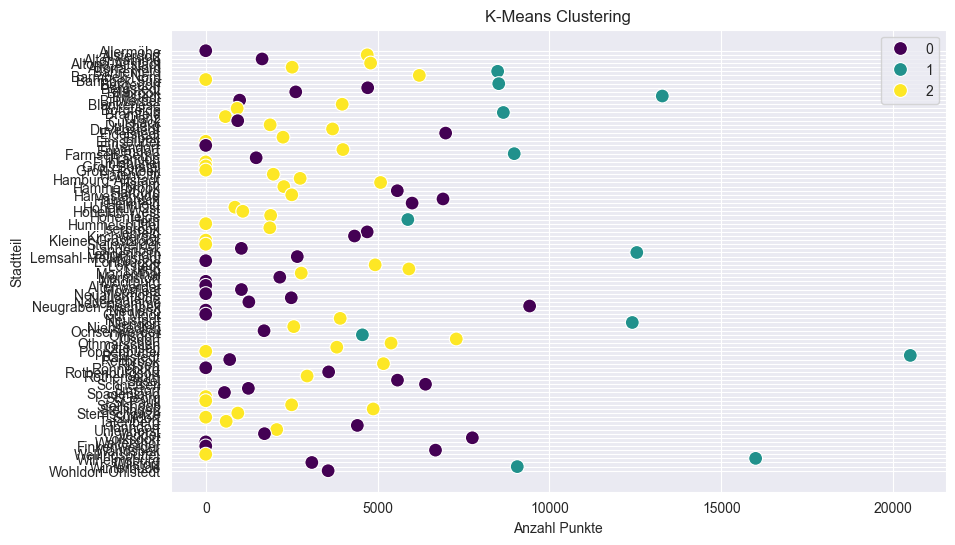

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anzahl_Punkte', y='Stadtteil', hue='Cluster', data=merged_featureset, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Anzahl Punkte')
plt.ylabel('Stadtteil')
plt.legend()
plt.show()

<Axes: >

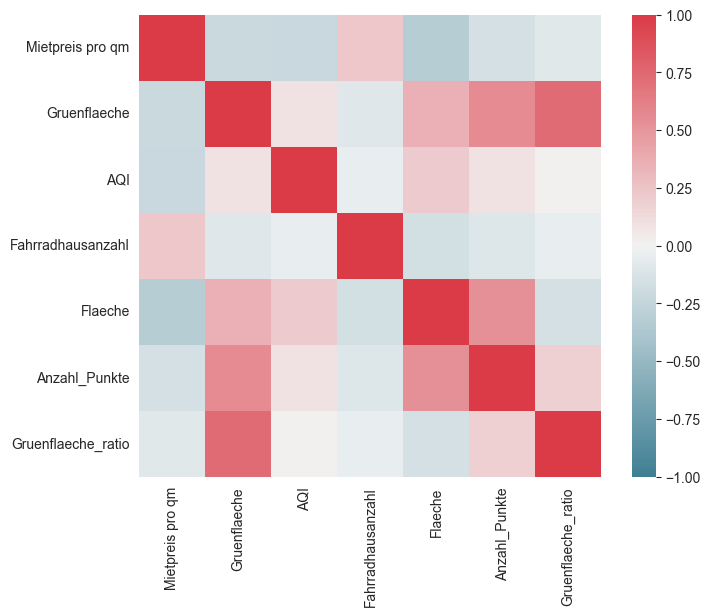

In [7]:


f, ax = plt.subplots(figsize=(8, 6))
corr = X.corr(method='pearson')
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [8]:
# Schauen welche Ergebnisse Agglomerative Hierarchical Clustering bringt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Extract features for clustering
X = merged_featureset.drop('Stadtteil', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Choose the number of clusters
num_clusters = 3

# Initialize and fit the Agglomerative Hierarchical Clustering model
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
y_agglo = agglomerative.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
merged_featureset['Cluster'] = y_agglo

# Display the cluster assignments for each Stadtteil
merged_featureset[['Stadtteil', 'Cluster']]


C:\Users\lukas\AppData\Local\Temp\ipykernel_23080\1142241246.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_featureset['Cluster'] = y_agglo


,Stadtteil,Cluster
0,Allermöhe,2
1,Alsterdorf,0
2,Altengamme,2
3,Altona-Altstadt,0
4,Altona-Nord,0
...,...,...
98,Wellingsbüttel,0
99,Wilhelmsburg,1
100,Wilstorf,2
101,Winterhude,1


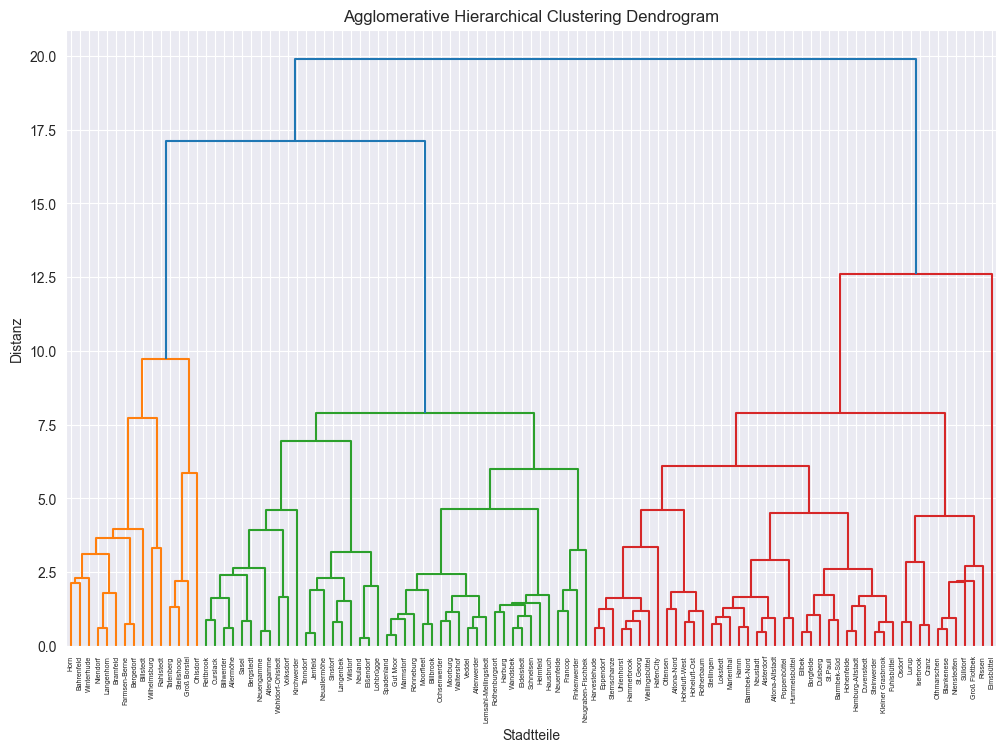

In [9]:
# hier wollen wir nachvollziehen, wie die Cluster zustande gekommen sind

from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix using Ward linkage (you can adjust the linkage method)
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=merged_featureset['Stadtteil'].values, orientation='top', distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Stadtteile')
plt.ylabel('Distanz')
plt.show()

In [12]:
# Analyse der Cluster

# Durchschnitt
merged_featureset_features = merged_featureset.drop('Stadtteil', axis=1)

cluster_means = merged_featureset_features.groupby('Cluster').mean()
cluster_means

,Mietpreis pro qm,Gruenflaeche,AQI,Fahrradhausanzahl,Flaeche,Anzahl_Punkte,Gruenflaeche_ratio
Cluster,,,,,,,
0,11.142263,0.365740,2.157991,8.444444,3.914110,2406.333333,0.089701
1,9.804376,2.210516,2.178327,1.266667,11.595386,8797.600000,0.262126
2,9.622554,0.394656,2.180460,0.000000,9.230412,2646.790698,0.060255


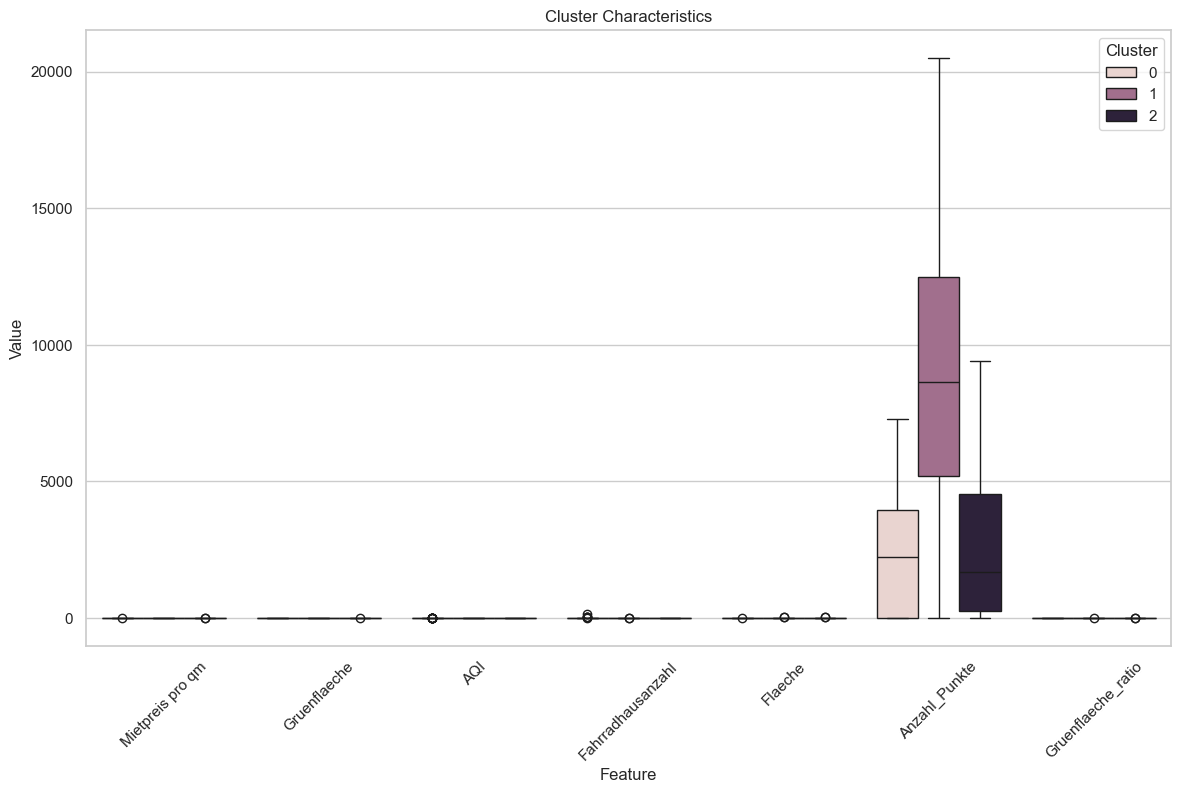

In [13]:
# plots für Charakteristika der Cluster

sns.set(style='whitegrid')

# melt dataframe for easier plotting
melted_data = pd.melt(merged_featureset, id_vars=['Cluster', 'Stadtteil'], var_name='Feature', value_name='Value')

# plot features across clusters
plt.figure(figsize=(14,8))
sns.boxplot(x='Feature', y='Value', hue='Cluster', data=melted_data)
plt.title('Cluster Characteristics')
plt.xticks(rotation=45)
plt.show()

In [55]:
# jetzt vergleichen wir das mal mit 4 Clustern und sehen wie das Dendrogramm dann aussieht
# Choose the number of clusters
num_clusters = 4

# Initialize and fit the Agglomerative Hierarchical Clustering model
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
y_agglo = agglomerative.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
merged_featureset['Cluster'] = y_agglo

# Display the cluster assignments for each Stadtteil
merged_featureset[['Stadtteil', 'Cluster']]


C:\Users\lukas\AppData\Local\Temp\ipykernel_30432\3380985502.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_featureset['Cluster'] = y_agglo


,Stadtteil,Cluster
0,Allermöhe,0
1,Alsterdorf,0
2,Altengamme,0
3,Altona-Altstadt,0
4,Altona-Nord,0
...,...,...
98,Wellingsbüttel,0
99,Wilhelmsburg,1
100,Wilstorf,1
101,Winterhude,1


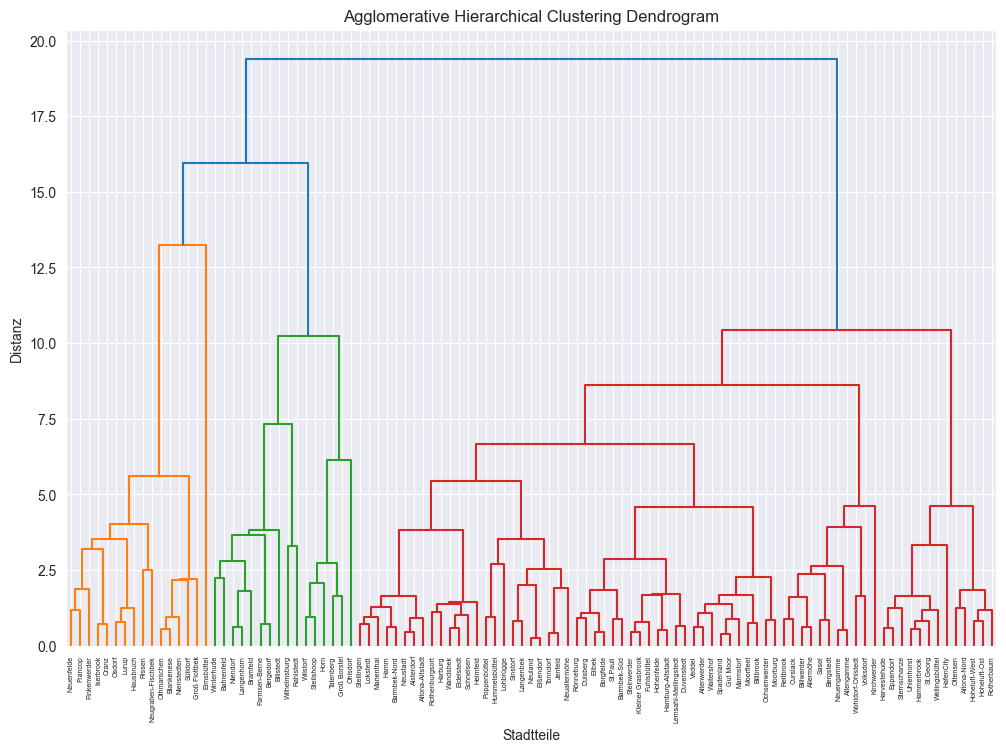

In [57]:
# Extract features for clustering
X = merged_featureset.drop('Stadtteil', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a linkage matrix using Ward linkage (you can adjust the linkage method)
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=merged_featureset['Stadtteil'].values, orientation='top', distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Stadtteile')
plt.ylabel('Distanz')
plt.show()